# LOO CV Optimisation Test

In [1]:
import numpy as np
import gpflow as gp
from dora.active_sampling.gpr_cached import GPRCached
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
x_min = 0
x_max = 30
def ground_truth(X):
    return np.sin(X-5) + np.sin(X/2-2) + 0.4*np.sin(X/5-2) + 0.4*np.sin(X-3) + 0.2*np.sin(X/0.3-3)

x = np.arange(x_min, x_max, 0.1)[:,None]
y = ground_truth(x)

In [3]:
def plot(m):
    mf, vf = m.predict_y(x)
    pl.figure(figsize=(15,5))
    pl.plot(x, y,'k'); 
    pl.plot(xt, yt,'go', markersize=10)
    pl.plot(x, mf,'b--')
    y1 = mf - np.sqrt(vf)*2
    y2 = mf + np.sqrt(vf)*2
    pl.fill_between(x[:,0], y1[:,0], y2[:,0], where=(y2 >= y1)[:,0], facecolor='lightblue')
    pl.xlabel('x')
    pl.ylabel('f(x)')
    pl.legend(('Ground truth', 'Observations', "Predicted mean",'Predicted 2 standard deviation'))
    pl.title("Sampler's predicted mean function and predicted two standard deviations")
    pl.show()

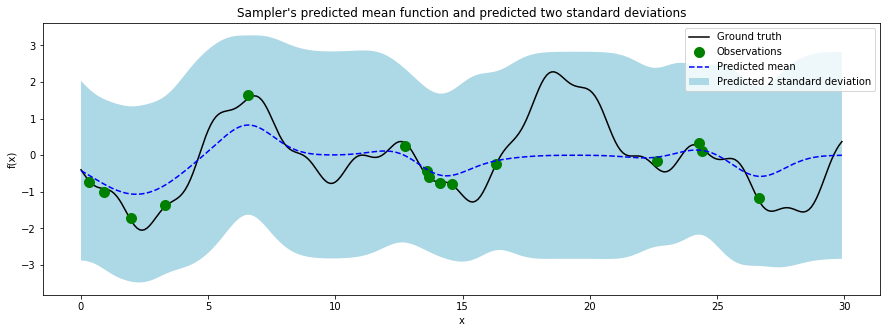

In [4]:
n = 15
xt = np.random.uniform(x_min, x_max, (n, 1))
yt = ground_truth(xt) + np.random.normal(scale=0.1, size=(n, 1))
kern = gp.kernels.RBF(1)
m = GPRCached(xt, yt, kern)

# No Optimisation
plot(m)

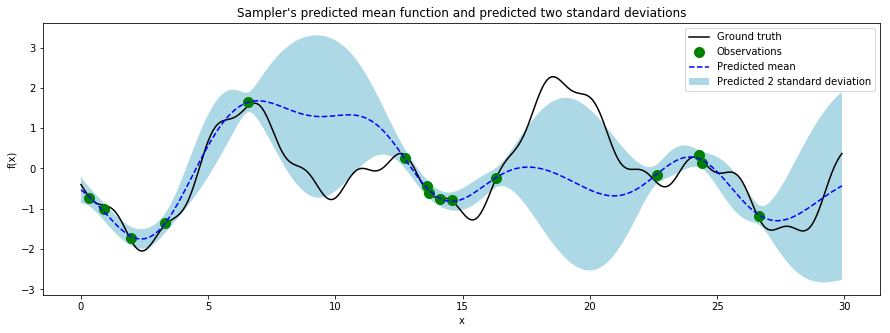

      fun: 0.88083340384093312
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.54839361e-05,  -1.41675691e-06,   8.83729710e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 13
   status: 0
  success: True
        x: array([ 1.84235526,  1.24778021, -4.90292888])

In [5]:
# LOO CV optimisation
res = m.optimize(loo_cv=True)
plot(m)
res

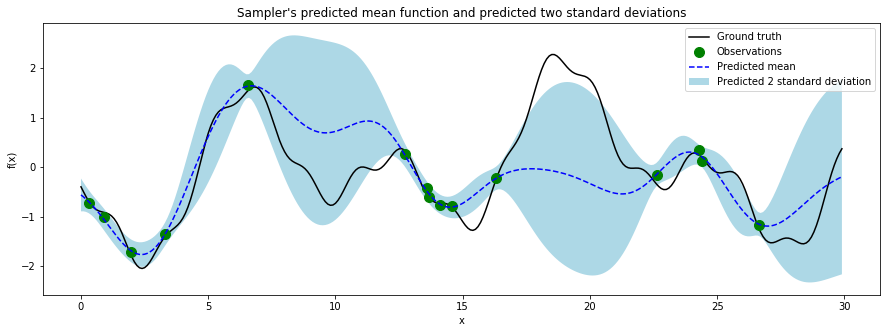

      fun: 9.7444288491323796
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.30378796e-06,  -1.29980245e-05,   4.43289179e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 10
      nit: 8
   status: 0
  success: True
        x: array([ 1.46885661,  0.53213993, -4.96126538])

In [6]:
# log marginal likelihood optimisation
res = m.optimize()
plot(m)
res